# モンテカルロ積分

$\int f(x) dx = (b-a)E[f(x)]$
として、積分を一様分布の期待値ととらえる。

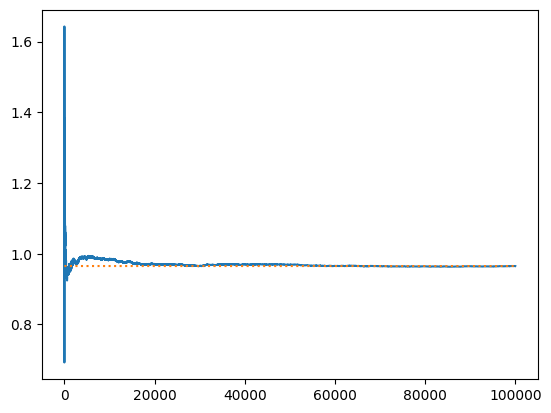

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# f(x) = (cos(50x) + sin(20x))^2のとき
def f(x):
    return (np.cos(50*x) + np.sin(20*x))**2

Integrate = []
mean = 0
for _ in range(10**5):
    u = np.random.uniform()
    mean = (mean*len(Integrate) + f(u))/(len(Integrate) + 1) # 毎回 平均を計算するより、逐次的に計算した方が早い。
    Integrate.append(mean)

plt.figure()
plt.plot(range(10**5), Integrate)
plt.plot(range(10**5),[0.96520]*10**5, linestyle = "dotted")
plt.show()

    


# 周辺確率密度関数

次は、先ほどとは違い真値が計算できないものに対して実施する。

長さNの観測$x_1, x_2, \cdots, x_N | \theta$は独立でコーシー分布$C(\theta, 1)$に従い、Θには、C(0,1)の事前分布を仮定する。
このとき、尤度と周辺確率密度関数は、それぞれ

$$
p(x^N|\theta) = \Pi\frac{1}{\pi (1 + (x_n - \theta)^2)}, p(\theta) = \frac{1}{\pi(1+\theta)^2}
$$
である。したがって、周辺確率密度関数は、
$$
p(x^N) = \int_{-\infty}^{\infty} p(x^N|\theta)p(\theta) d\theta =  \int_{-\infty}^{\infty} p(x^N|\theta)p(\theta) d\theta = \int_{-\infty}^{\infty} \Pi\frac{1}{\pi (1 + (x_n - \theta)^2)}\frac{1}{\pi(1+\theta)^2}
$$

$p(\theta) = \frac{1}{\pi(1+\theta)^2}, f(\theta) = \Pi\frac{1}{\pi (1 + (x_n - \theta)^2)}$
として、$I = \int p(\theta)f(\theta) d\theta$ として計算できる。

つまり、$\theta_1, \theta_2, \cdots, \theta_M$をC(0,1)から、生成し、
$$
\frac{1}{M}\sum_m \Pi_n \frac{1}{\pi (1 + (x_n - \theta_m)^2)}
$$
を計算すればよい。


[  1.43858429   0.83107362  50.28228691   3.21671851   1.05003128
   1.63719818  -0.8865946   -4.41329859 -69.77573234   0.30459279]
0.2044565918757304
0.06385186379647427
8.261523006529198e-06
3.566980410736487e-07
1.0066252830735545e-07
1.6928935339110578e-08
1.5426627050856038e-09
1.8141356673808343e-11
1.162645918051618e-15
3.2170956808243916e-16
[1.3488772380383083e-20, 6.890425206828684e-21, 1.1623298405103484e-16, 8.811447970066752e-17, 7.142821006746899e-17, 6.136797803282845e-17, 7.655485184067033e-17, 7.272529678478043e-17, 6.985793591430531e-17, 6.645129037492865e-17, 6.252011871961651e-17, 5.807775019557957e-17, 7.299630976613324e-17, 7.101289844163517e-17, 9.329100576226372e-17, 8.746180594737766e-17, 8.231699383282603e-17, 7.778931733396226e-17, 7.383236612293458e-17, 7.065228042533094e-17, 7.135431487084682e-17, 8.425466386537867e-17, 9.775464487775862e-17, 9.539320718452948e-17, 9.159262754722538e-17, 8.807015914435399e-17, 8.481582808475264e-17, 8.178669136765004e-17, 

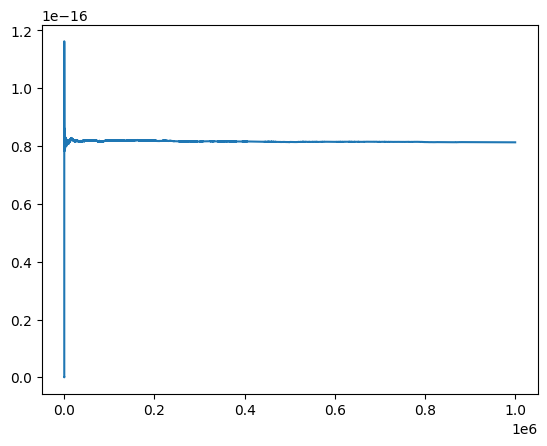

In [4]:
from scipy.stats import cauchy
N = 10 # 観測データの数
M = 10**6 # 積分で使うデータのサンプル数
theta_ = np.random.standard_cauchy() # 事前分布からサンプル
X = cauchy.rvs(loc=theta_, scale=1, size=N)
theta = np.random.standard_cauchy(size=M)

I = []
mean = 0
i=0
print(X)
while(len(I) < M):
    _theta = theta[i]
    product = 1
    for x in X:
        product *= 1/(np.pi* ( 1+(x - _theta)**2))
        if i == 100:
            print(product)
    mean = (mean*len(I) + product)/(len(I) +1)
    I.append(mean)
    i+=1
print(I[:100])
plt.figure()
plt.plot(range(len(I)), I)
plt.show()

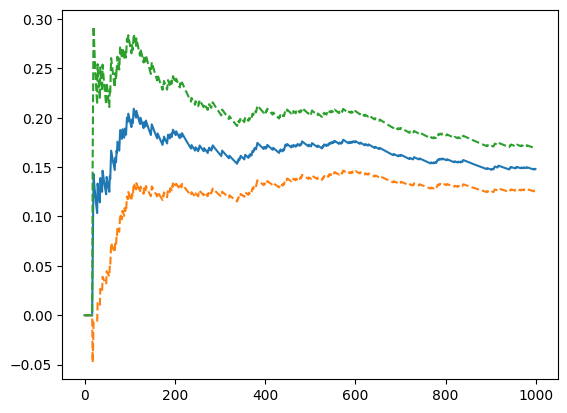

In [12]:
# 信頼区間
# コーシー分布の裾隔確率 I = \int_2^{\infty} 1/(pi*(1+x**2))

Integral = []
i_m = 0
simga = []
sum_diff_square = []
lm=  []
um = []
for i in range(1000):
    p = np.random.standard_cauchy()
    if p >= 2:
        val = 1
    else:
        val = 0
    i_m = (i_m*len(Integral) + val)/(len(Integral) + 1)
    Integral.append(i_m)
    sum_diff_square.append((val - i_m)**2)
    
    if i == 0:
        sigma = sum(sum_diff_square)
        
    else:
        sigma = sum(sum_diff_square)/i
    lm.append(i_m-np.sqrt(sigma)*1.96/np.sqrt(i+1))
    um.append(i_m+np.sqrt(sigma)*1.96/np.sqrt(i+1))

plt.figure()
plt.plot(range(len(Integral)), Integral)
plt.plot(range(len(Integral)), lm, linestyle="--")
plt.plot(range(len(Integral)), um, linestyle="--")
plt.show()
    
